In [20]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Constants
DATA_PATH = "./Desktop/Data"
AUGMENTATION_MULTIPLIER = 25  # How many times to augment each sample
SAMPLE_RATE = 22050

In [21]:
def load_audio_files(data_path):
    data = []
    labels = []
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(data_path, file_name)
            label = file_name.split('.')[0]
            audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            data.append(audio)
            labels.append(label)
    return data, labels

def extract_features(audio, sr=SAMPLE_RATE, n_mfcc=40):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

def augment_audio(audio, sr=SAMPLE_RATE):
    augmented_audios = []
    augmented_audios.append(audio)
    # Time stretching
    augmented_audios.append(librosa.effects.time_stretch(audio, rate=0.9))
    augmented_audios.append(librosa.effects.time_stretch(audio, rate=1.1))
    # Pitch shifting
    augmented_audios.append(librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=-2))
    augmented_audios.append(librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=2))
    # Adding noise
    noise = np.random.randn(len(audio))
    augmented_audios.append(audio + 0.005 * noise)
    return augmented_audios

def prepare_dataset(data, labels):
    features = []
    new_labels = []
    for i, audio in enumerate(data):
        augmented_audios = augment_audio(audio)
        for aug_audio in augmented_audios:
            mfccs = extract_features(aug_audio)
            features.append(mfccs)
            new_labels.append(labels[i])
    return np.array(features), np.array(new_labels)

Listening to and visualizing: A.wav


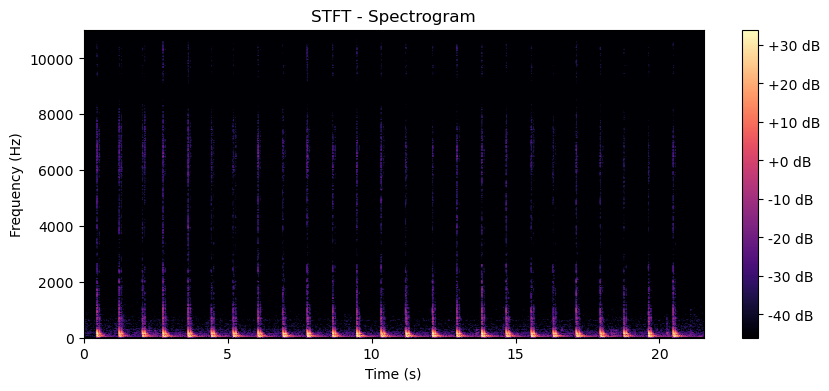

Listening to and visualizing: B.wav


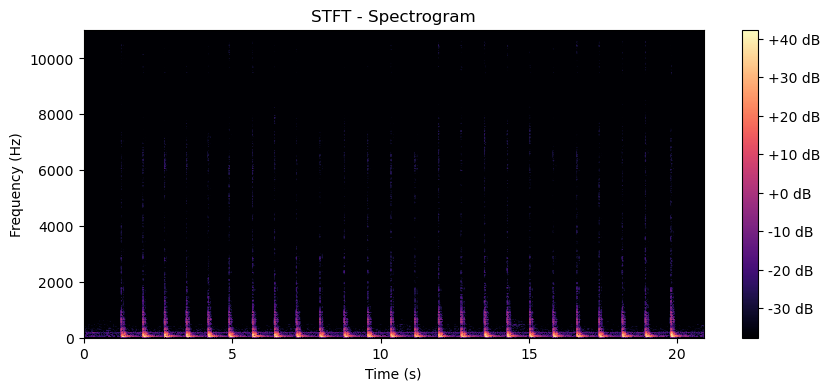

Listening to and visualizing: C.wav


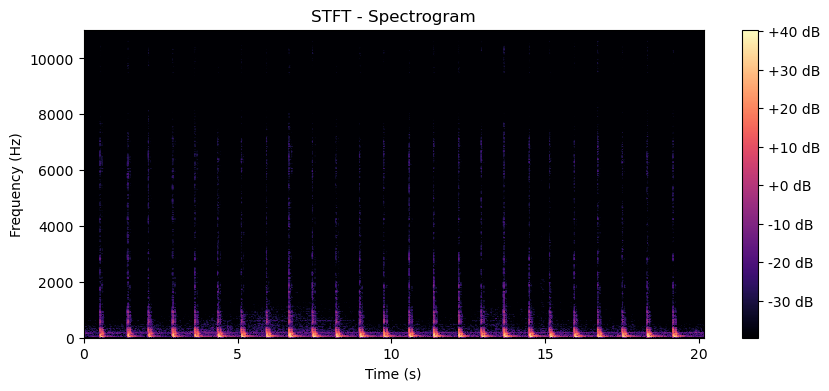

Listening to and visualizing: D.wav


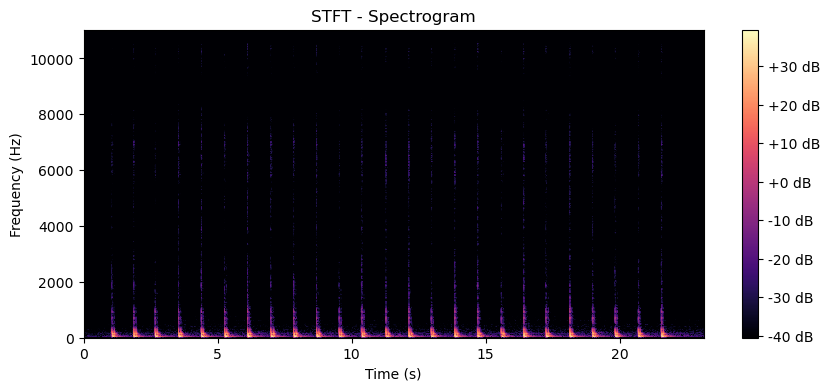

Listening to and visualizing: E.wav


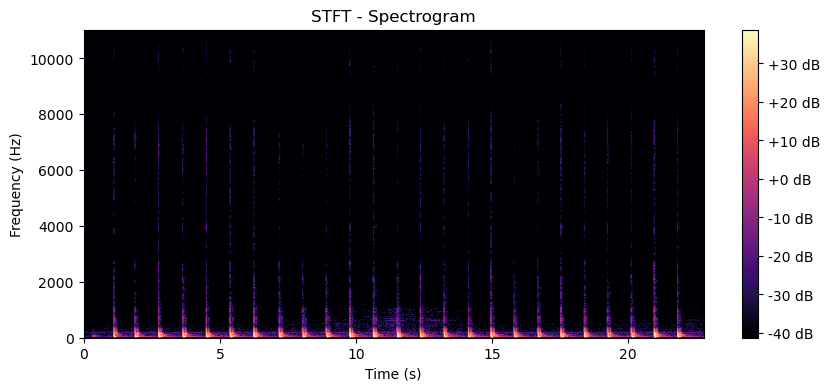

Listening to and visualizing: F.wav


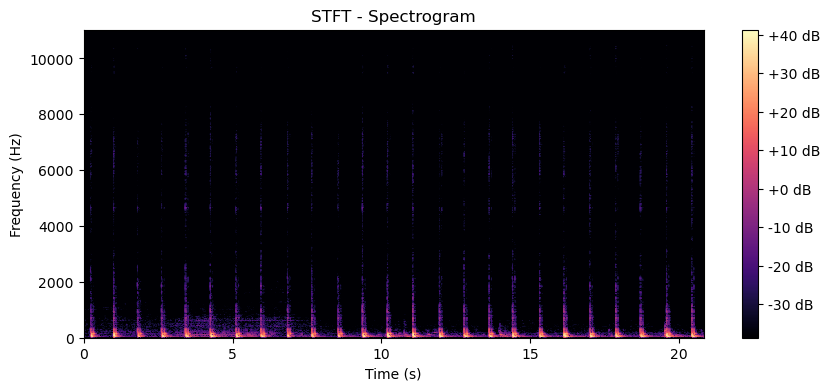

Listening to and visualizing: G.wav


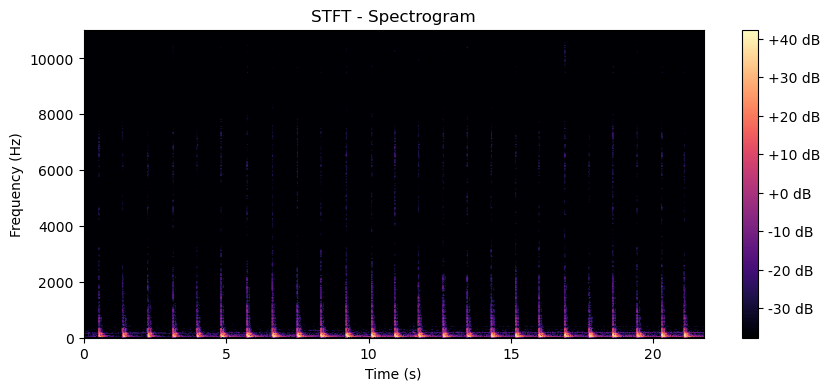

Listening to and visualizing: H.wav


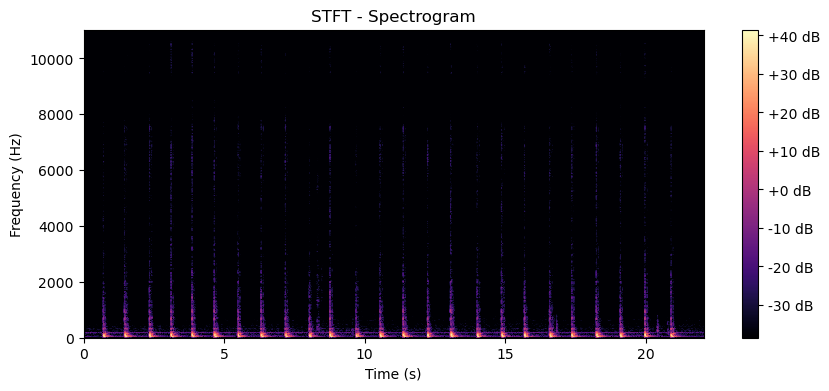

Listening to and visualizing: I.wav


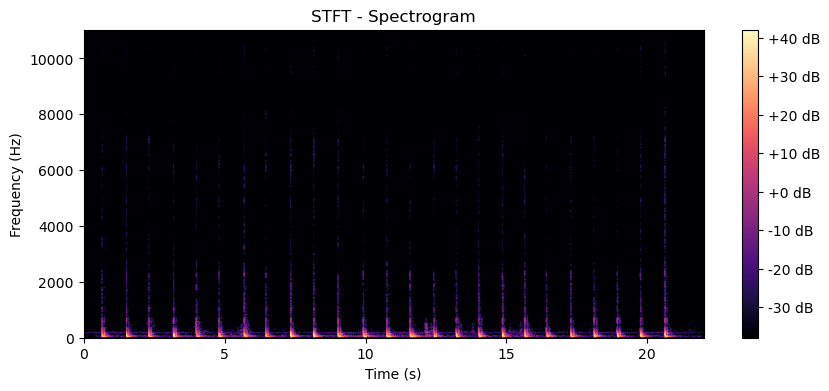

Listening to and visualizing: J.wav


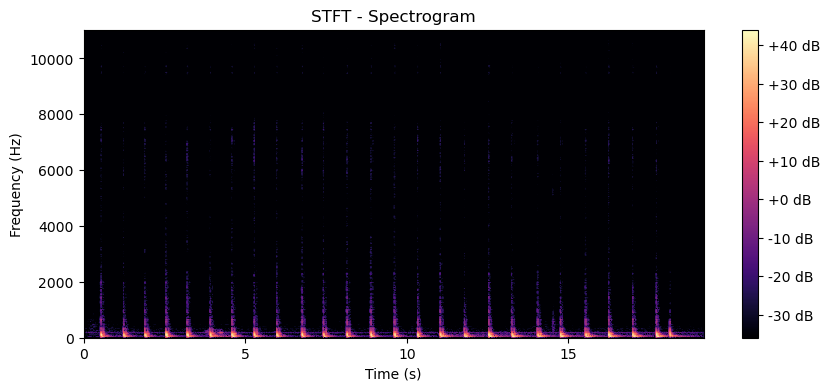

Listening to and visualizing: K.wav


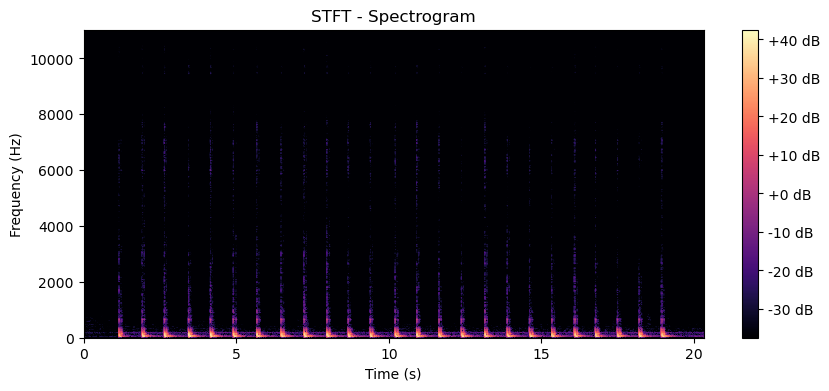

Listening to and visualizing: L.wav


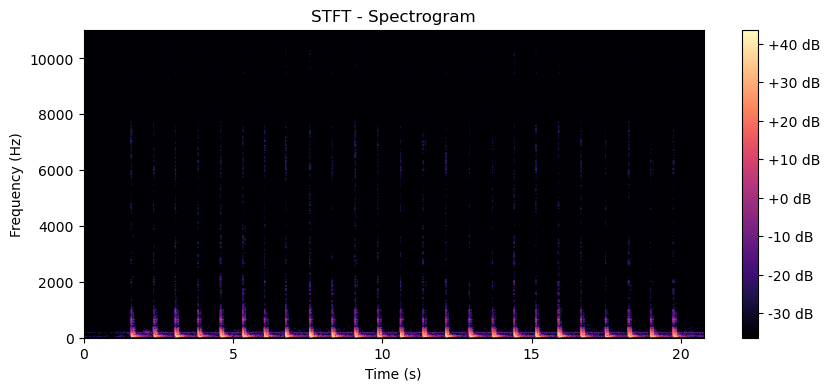

Listening to and visualizing: M.wav


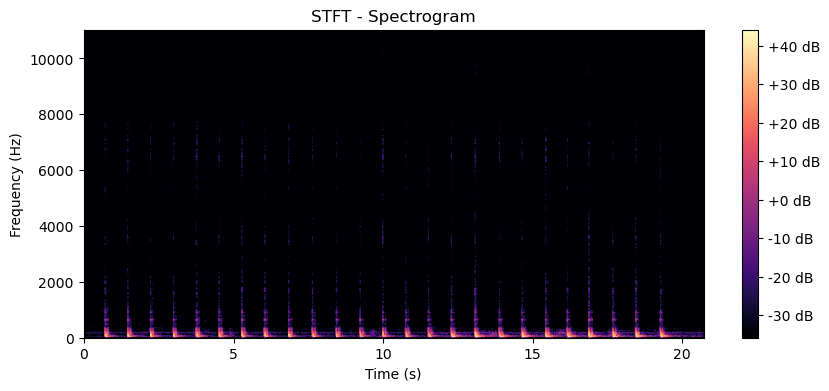

Listening to and visualizing: N.wav


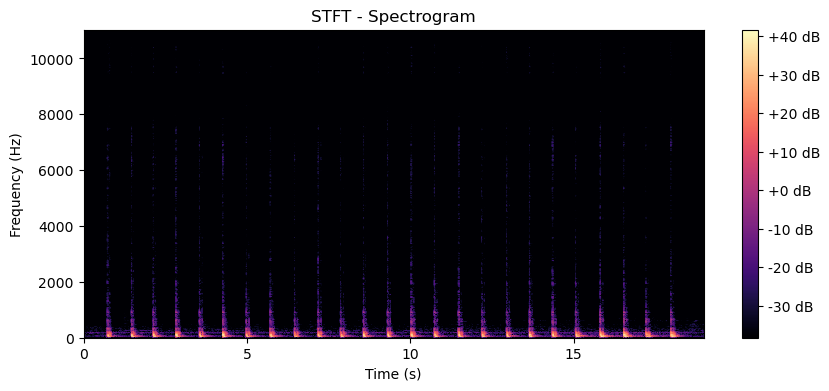

Listening to and visualizing: O.wav


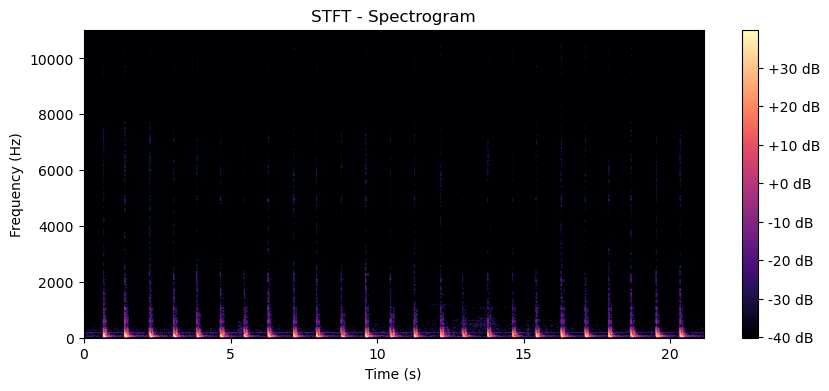

Listening to and visualizing: P.wav


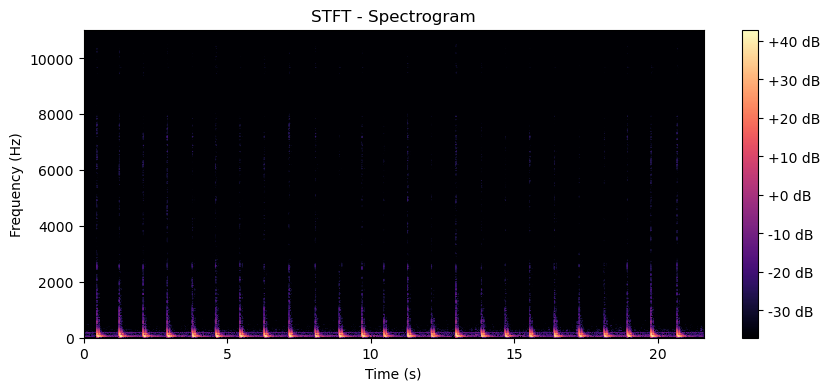

Listening to and visualizing: Q.wav


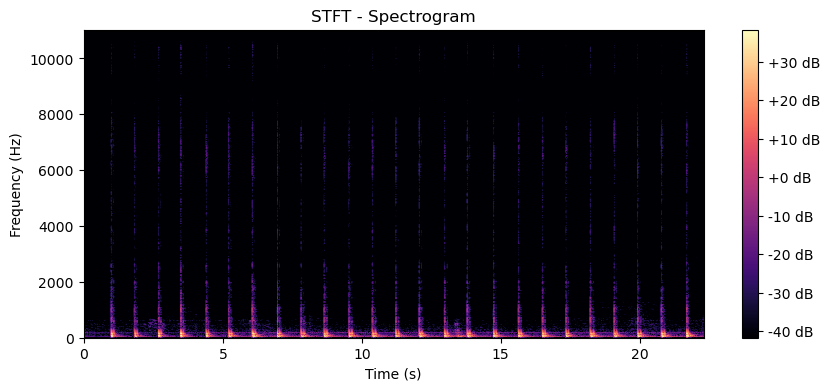

Listening to and visualizing: R.wav


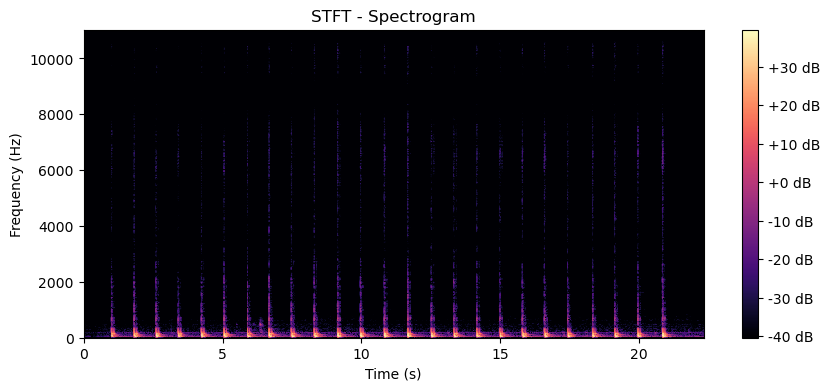

Listening to and visualizing: S.wav


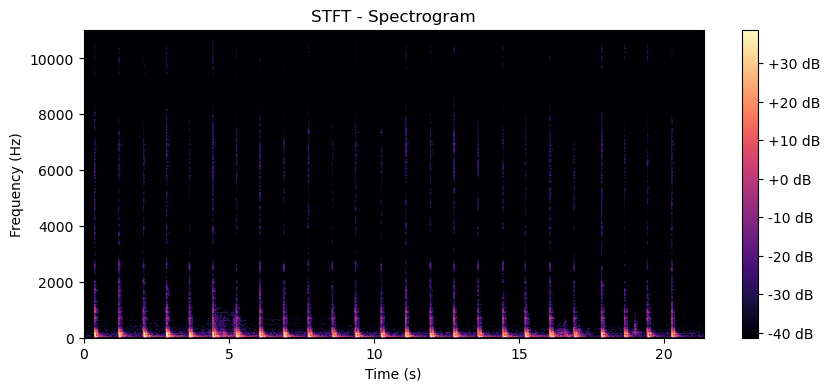

Listening to and visualizing: T.wav


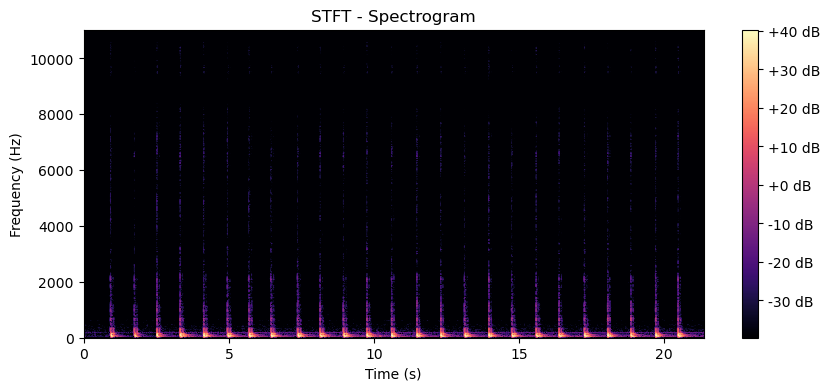

Listening to and visualizing: U.wav


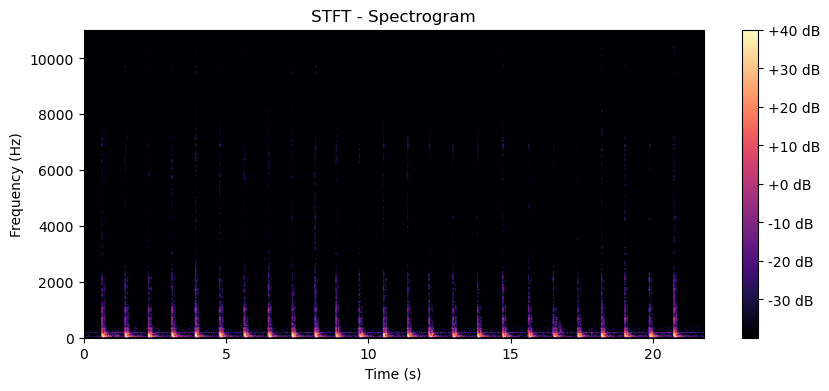

Listening to and visualizing: V.wav


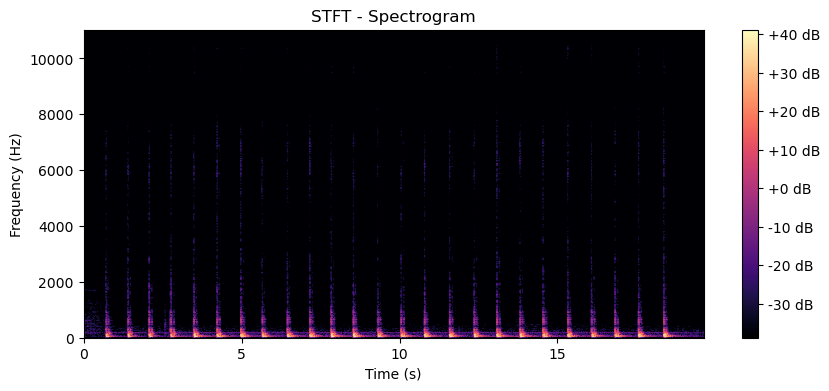

Listening to and visualizing: W.wav


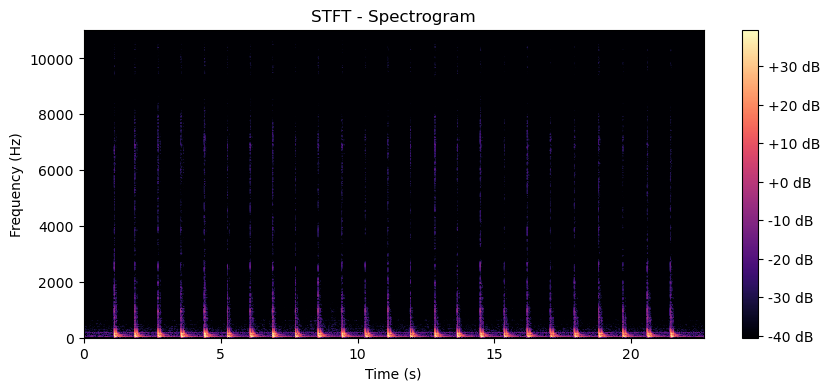

Listening to and visualizing: X.wav


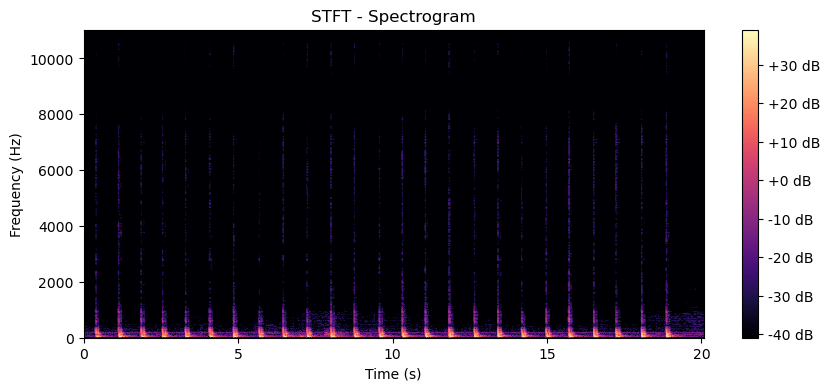

Listening to and visualizing: Y.wav


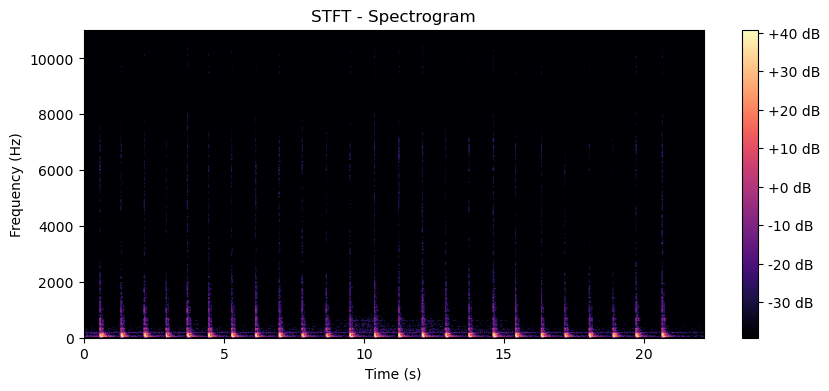

Listening to and visualizing: Z.wav


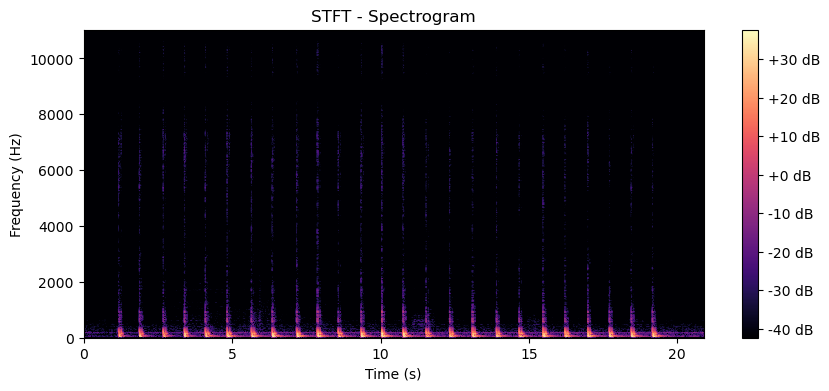

Listening to and visualizing: 0.wav


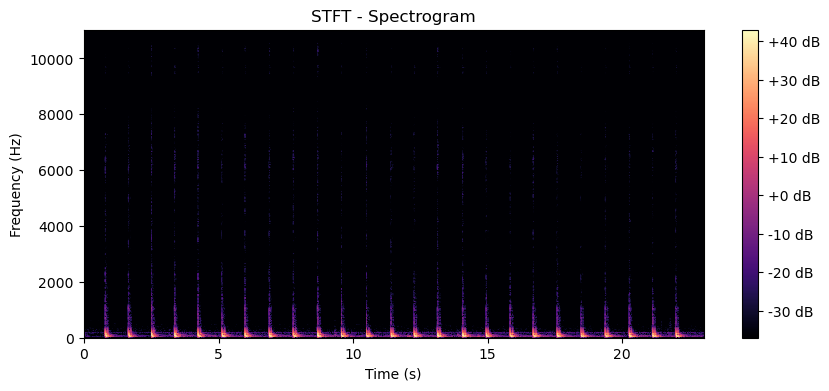

Listening to and visualizing: 1.wav


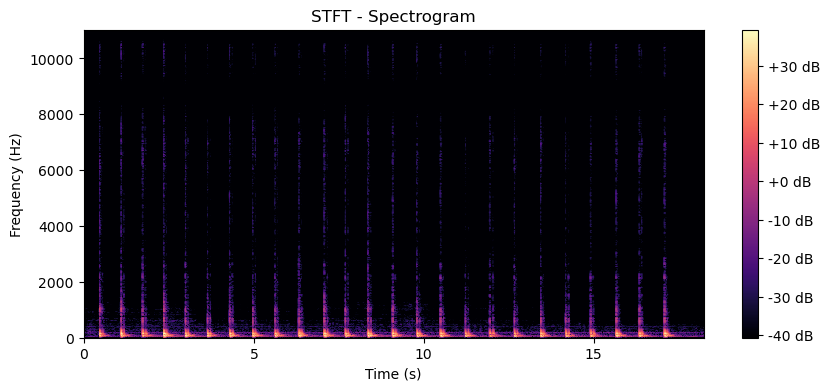

Listening to and visualizing: 2.wav


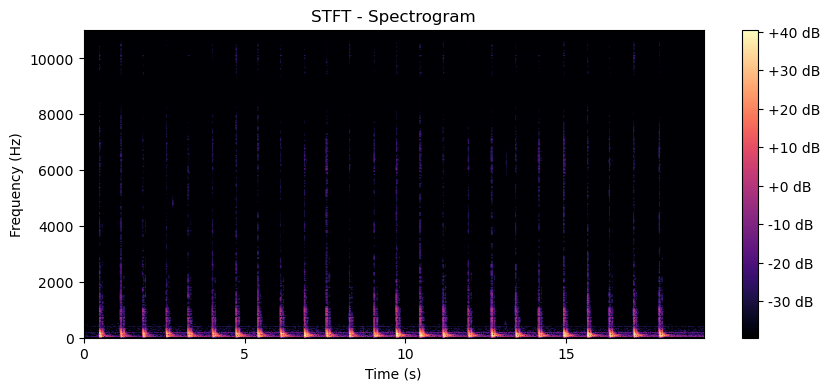

Listening to and visualizing: 3.wav


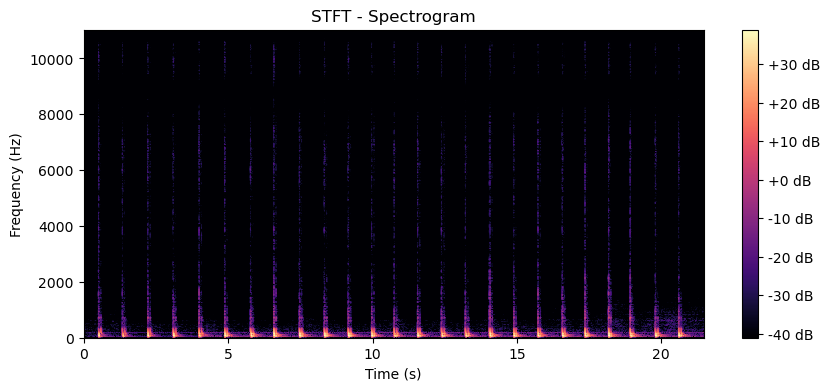

Listening to and visualizing: 4.wav


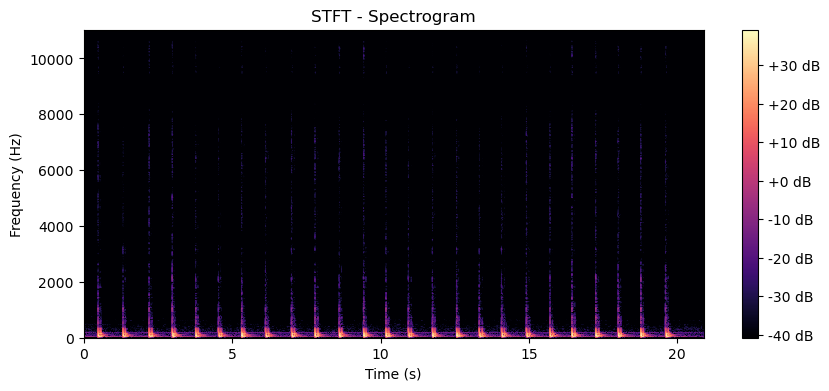

Listening to and visualizing: 5.wav


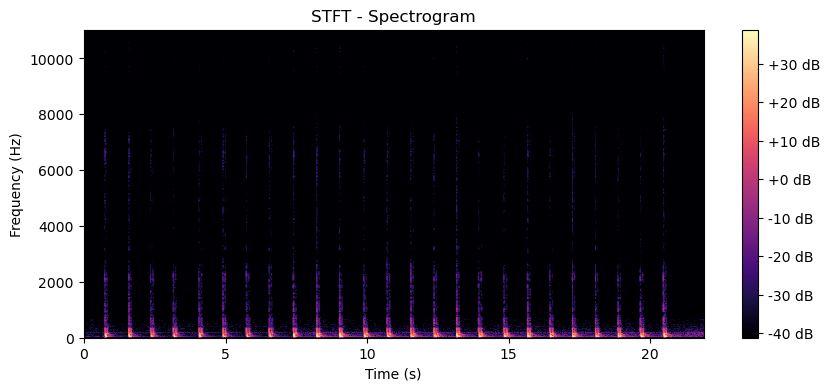

Listening to and visualizing: 6.wav


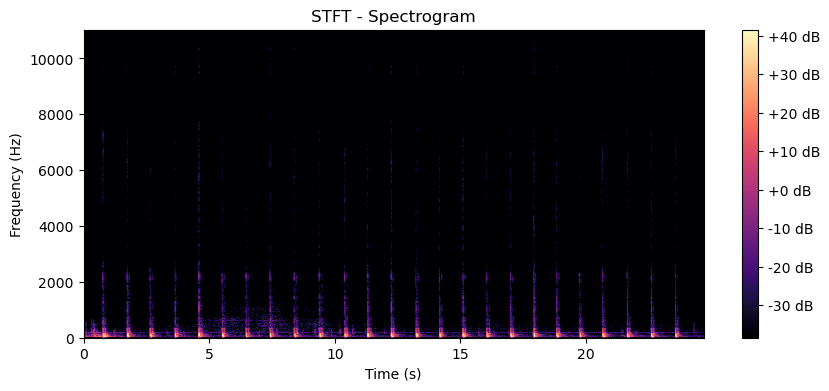

Listening to and visualizing: 7.wav


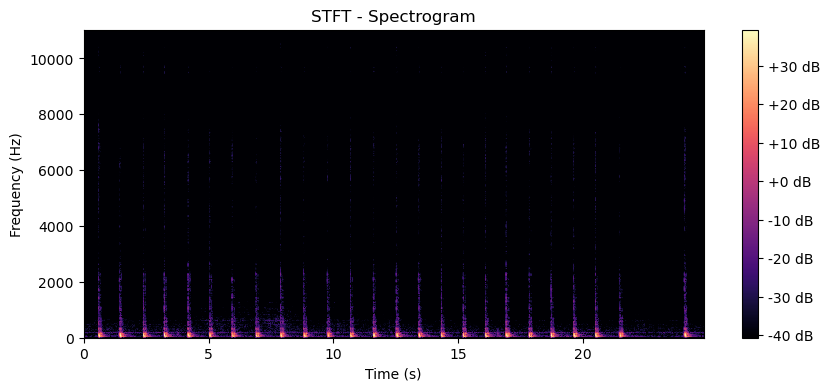

Listening to and visualizing: 8.wav


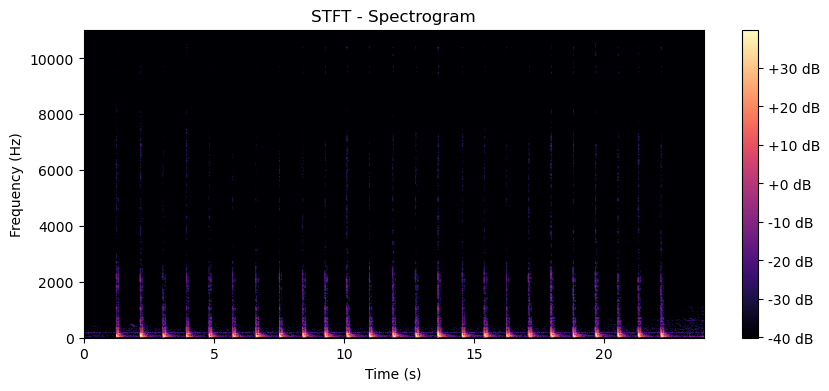

Listening to and visualizing: 9.wav


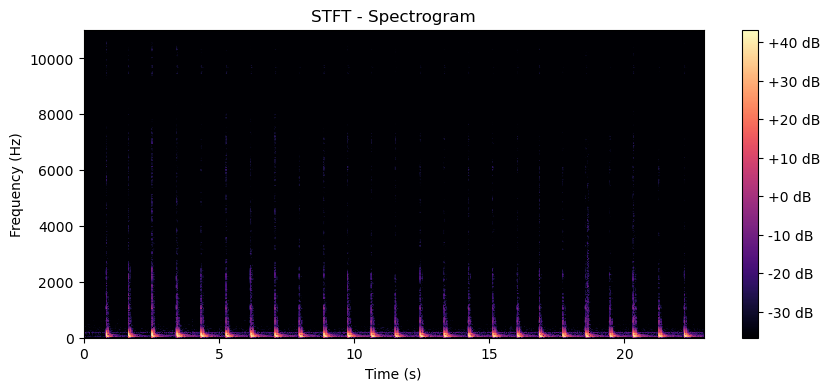

In [22]:
def read_audio(file_path):
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    return audio, sr
def isolate_keystrokes(audio, sr):
    hop_length = 512
    n_fft = 2048
    stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT - Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


for key in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
            'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
    file_name = f"{key}.wav"  # Change the file name as needed
    audio_file_path = os.path.join(DATA_PATH, file_name)
    print(f"Listening to and visualizing: {file_name}")
    audio, sr = read_audio(audio_file_path)
    isolate_keystrokes(audio, sr)

In [ ]:
audio_data, labels = load_audio_files(DATA_PATH)
features, labels = prepare_dataset(audio_data, labels)

In [ ]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, categorical_labels, test_size=0.2, random_state=42)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Encode labels
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy using Random Forest: {accuracy * 100:.2f}%')
